In [235]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

import prettytable as pt

In [236]:
def load_data():
    path = "./data/iris.data"
    df = pd.read_fwf(path, header = None)
    df = df[0].str.split(',',expand = True)
    df.iloc[ : , : 4] = df.iloc[ : , : 4].astype(float)
    return df

In [237]:
def label_encoding(y):
    labelencoder = LabelEncoder()
    y = labelencoder.fit_transform(y)
    return y

In [238]:
def draw_Avg(df):
    avg = df.iloc[ : , : 4].mean()
    colors = ['red', 'green', 'blue', 'pink']
    feature = ["sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm"]
    index = ['0', '1', '2', '3']
    
    x = range(4)
    for i in range(4):
        plt.bar(index[i], avg[i], color = colors[i], label = feature[i])
    
    plt.title("Average")
    plt.legend()
    plt.show()

In [239]:
def draw_Std(df):
    Std = df.iloc[ : , : 4].std()
    colors = ['red', 'green', 'blue', 'pink']
    feature = ["sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm"]
    index = ['0', '1', '2', '3']
    
    x = range(4)
    for i in range(4):
        plt.bar(index[i], Std[i], color = colors[i], label = feature[i])
    
    plt.title("Standard Deviation")
    plt.legend()
    plt.show()

In [240]:
def draw_ValueCount(df):
    for i in range(4):
        feature = ["sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm"]
        colors = ['red', 'green', 'blue', 'pink']
        
        print("Feature \"{}\":".format(feature[i]))
        
        freq = df[i].value_counts().sort_index()
        freq.plot.hist(color = colors[i], label = feature[i])
        plt.title("Value Count (Total)")
        plt.legend()
        plt.show()
        
        df_I_s = df[(df[4] == "Iris-setosa")]
        freq_I_s = df_I_s[i].value_counts().sort_index()
        freq_I_s.plot.hist(color = colors[i], label = feature[i])
        plt.title("Value Count (Label is \"Iris-setosa\")")
        plt.legend()
        plt.show()
        
        print(":")
        df_I_ve = df[(df[4] == "Iris-versicolor")]
        freq_I_ve = df_I_ve[i].value_counts().sort_index()
        freq_I_ve.plot.hist(color = colors[i], label = feature[i])
        plt.title("Value Count (Label is \"Iris-versicolor\")")
        plt.legend()
        plt.show()
        
        df_I_vi = df[(df[4] == "Iris-virginica")]
        freq_I_vi = df_I_vi[i].value_counts().sort_index()
        freq_I_vi.plot.hist(color = colors[i], label = feature[i])
        plt.title("Value Count (Label is \"Iris-virginica\")")
        plt.legend()
        plt.show()

In [241]:
def Gaussian(X_train, X_test, y_train, y_test):
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

In [242]:
def holdout_validation(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 
    y_pred = Gaussian(X_train, X_test, y_train, y_test)
    c_m = confusion_matrix(y_test, y_pred)
    a_s = accuracy_score(y_test, y_pred) 
    r_s = recall_score(y_test, y_pred, average = 'macro')
    p_s = precision_score(y_test, y_pred, average = 'macro')
    h_list = ["Holdout", c_m, a_s, r_s, p_s]
    return h_list

In [243]:
def k_fold(X, y):
    k = 3
    kf = KFold(n_splits = k)
    
    total_c_m, total_a_s, total_r_s, total_p_s = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]]), np.array([]), np.array([]), np.array([])

    for train_index, test_index in kf.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        
        y_pred = Gaussian(X_train, X_test, y_train, y_test)
        c_m = confusion_matrix(y_test, y_pred)
        a_s = accuracy_score(y_test, y_pred) 
        r_s = recall_score(y_test, y_pred, average = 'macro')
        p_s = precision_score(y_test, y_pred, average = 'macro')
        
        total_c_m = total_c_m + c_m
        total_a_s = np.append(total_a_s, a_s)
        total_r_s = np.append(total_r_s, r_s)
        total_p_s = np.append(total_p_s, p_s)
        
    avg_c_m = total_c_m / k
    avg_a_s = np.mean(total_a_s)
    avg_r_s = np.mean(total_r_s)
    avg_p_s = np.mean(total_p_s)

    k_list = ["K-fold", avg_c_m, avg_a_s, avg_r_s, avg_p_s]

    return k_list

In [244]:
df = load_data()
df = shuffle(df) #index也洗了（在data裡一定有至少一筆相同的資料，但index不一定是原本的index）
X = df.drop(columns=[4]) #把feature提取出來
y = df[4] #label 
X = X.to_numpy()
y = label_encoding(y) #already array type

h_list = holdout_validation(X, y)
k_list = k_fold(X, y)

table = pt.PrettyTable()
table.field_names = ["Method", "Confusion Matrix", "Accuracy", "Sensitivity(Recall)", "Precision"]
table.add_row(h_list)
table.add_row(k_list)
print(table)

+---------+-----------------------------------------+--------------------+---------------------+--------------------+
|  Method |             Confusion Matrix            |      Accuracy      | Sensitivity(Recall) |     Precision      |
+---------+-----------------------------------------+--------------------+---------------------+--------------------+
| Holdout |               [[18  0  0]               | 0.9777777777777777 |  0.9743589743589745 | 0.9777777777777779 |
|         |                [ 0 14  0]               |                    |                     |                    |
|         |                [ 0  1 12]]              |                    |                     |                    |
|  K-fold |  [[16.66666667  0.          0.        ] |        0.96        |  0.9605006105006106 | 0.9613720701955996 |
|         |   [ 0.         15.66666667  1.        ] |                    |                     |                    |
|         |  [ 0.          1.         15.66666667]] |   

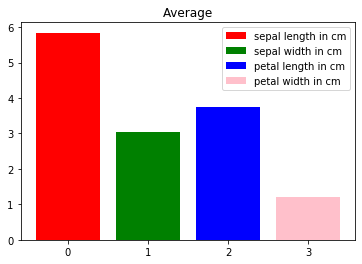

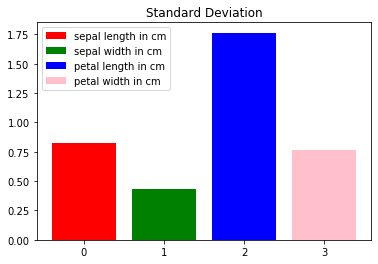

Feature "sepal length in cm":


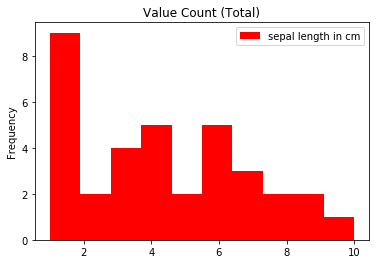

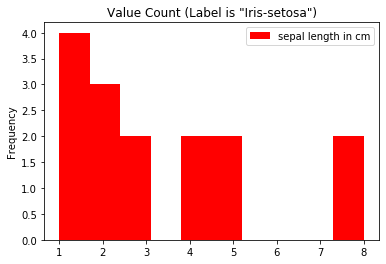

:


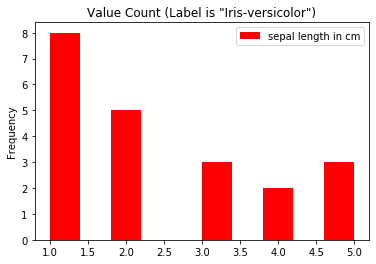

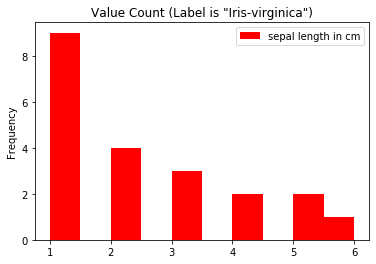

Feature "sepal width in cm":


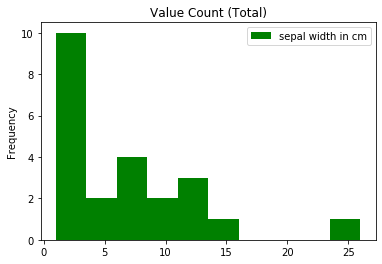

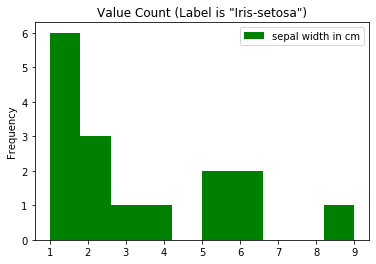

:


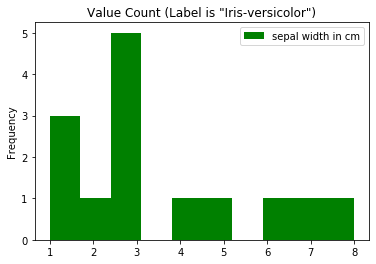

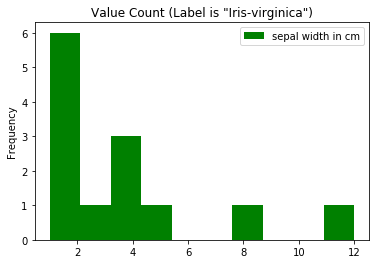

Feature "petal length in cm":


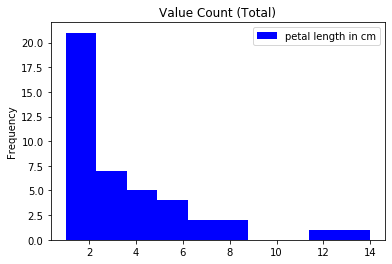

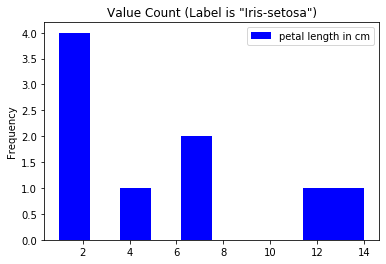

:


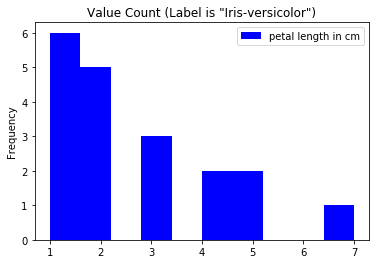

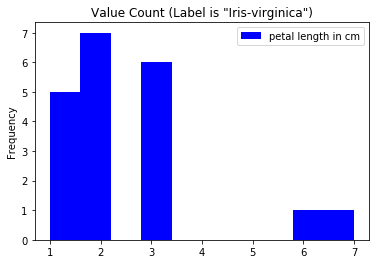

Feature "petal width in cm":


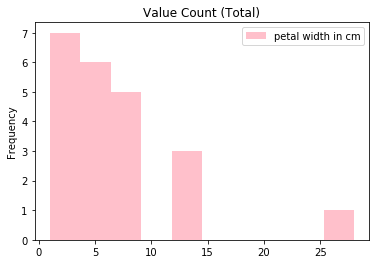

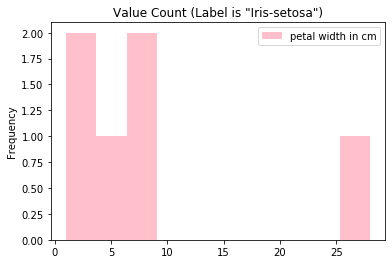

:


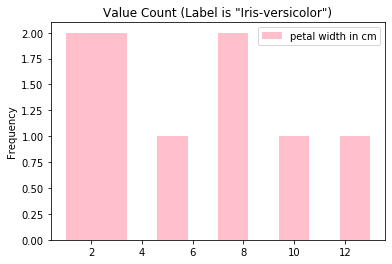

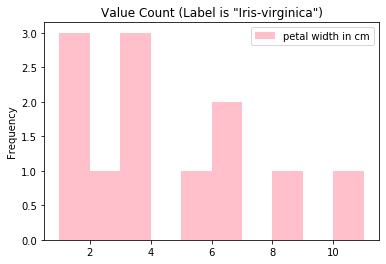

In [245]:
draw_Avg(df)
draw_Std(df)
draw_ValueCount(df)